In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv("Data/pima-indians-diabetes.csv")
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [5]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# feature cols

In [7]:
import tensorflow as tf

D:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [13]:
 assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

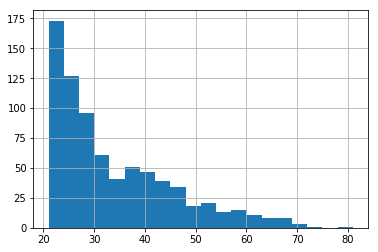

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [19]:
x_data = diabetes.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [21]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hosni\\AppData\\Local\\Temp\\tmpb_1c4z12', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002265DCC12B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\hosni\AppData\Local\Temp\tmpb_1c4z12\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 261.496
INFO:tensorflow:loss = 6.2414722, step = 101 (0.386 sec)
INFO:tensorflow:global_step/sec: 483.735
INFO:tensorflow:loss = 4.9653635, step = 201 (0.203 sec)
INFO:tensorflow:global_step/sec: 463.175
INFO:tensorflow:loss = 6.9112706, step = 301 (0.220 sec)
INFO:tensorflow:global_step/sec: 521.307
INFO:tensorflow:loss = 5.483522, step = 401 (0.192 sec)
INFO:tensorflow:global_step/sec: 529.721
INFO:tensorflow:loss = 3.5500333, step = 501 (0.193 sec)
INFO:tensorflow:global_step/sec: 517.086
INFO:tensorflow:loss = 5.07644, step = 601 (0.189 sec)
INFO:tensorflow:global_step/sec:

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [34]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-12-03:42:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpb_1c4z12\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-12-03:42:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.80045265, auc_precision_recall = 0.64667714, average_loss = 0.52632, global_step = 1000, label/mean = 0.35064936, loss = 5.0658298, precision = 0.64705884, prediction/mean = 0.36645854, recall = 0.54320985


In [30]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80045265,
 'auc_precision_recall': 0.64667714,
 'average_loss': 0.52632,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0658298,
 'precision': 0.64705884,
 'prediction/mean': 0.36645854,
 'recall': 0.54320985}

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [37]:
my_pred=list(model.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpb_1c4z12\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5071511], dtype=float32),
  'logits': array([0.02860636], dtype=float32),
  'probabilities': array([0.49284893, 0.5071511 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.63776535], dtype=float32),
  'logits': array([0.5656782], dtype=float32),
  'probabilities': array([0.36223465, 0.63776535], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35952154], dtype=float32),
  'logits': array([-0.57744145], dtype=float32),
  'probabilities': array([0.6404785, 0.3595215], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33514386], dtype=float32),
  'logits': array([-0.6850108], dtype=float32),
  'probabilities': array([0.66485614, 0.33514386], dtype=float32)},
 {'class_id

## DNN MODEL

In [39]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hosni\\AppData\\Local\\Temp\\tmpal3dyhd5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002265E414C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [41]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [43]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [51]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hosni\\AppData\\Local\\Temp\\tmpw2nqb7zj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000022660D770B8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\hosni\AppData\Local\Temp\tmpw2nqb7zj\model.ckpt.
INFO:tensorflow:loss = 7.01412, step = 1
INFO:tensorflow:global_step/sec: 264.088
INFO:tensorflow:loss = 4.8227396, step = 101 (0.383 sec)
INFO:tensorflow:global_step/sec: 384.236
INFO:tensorflow:loss = 3.0613842, step = 201 (0.256 sec)
INFO:tensorflow:global_step/sec: 446.392
INFO:tensorflow:loss = 5.6691165, step = 301 (0.228 sec)
INFO:tensorflow:global_step/sec: 515.803
INFO:tensorflow:loss = 9.086699, step = 401 (0.194 sec)
INFO:tensorflow:global_step/sec: 447.076
INFO:tensorflow:loss = 2.2806911, step = 501 (0.225 sec)
INFO:tensorflow:global_step/sec: 385.154
INFO:tensorflow:loss = 2.8871298, step = 601 (0.259 sec)
INFO:tensorflow:global_step/sec

In [53]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [54]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-12-04:00:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpw2nqb7zj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-12-04:00:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8324691, auc_precision_recall = 0.7118206, average_loss = 0.4873677, global_step = 1000, label/mean = 0.35064936, loss = 4.690914, precision = 0.64835167, prediction/mean = 0.3958586, recall = 0.72839504


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8324691,
 'auc_precision_recall': 0.7118206,
 'average_loss': 0.4873677,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.690914,
 'precision': 0.64835167,
 'prediction/mean': 0.3958586,
 'recall': 0.72839504}